# <span style="color:darkred"> Object Detection Project </span>
## <span style="color:darkred"> By Gerardo Carrera and Maanas Lalwani </span>
------------------------------------------------------------------
*For our Final Project we chose to cover Object detection as our general area of interest as it was an area we both had some knowledge on and it seemed like one of the more intresting types of methods for deep learning. Before we delve into what we attempted to achieve for our project, We should first cover how exactly object detection is being used today and what models exist for this type of deep learning!*

###  <span style="color:darkgreen"> Brief Literature surrounding Object Detection's history and Current Methods </span>
- So what is Object detection? According to Viso.AI, object detection is a computer vision task where it is used to detect instances of objects in images. Examples of this could be finding people in an image or finding cars in an image of a highway. A key principle of Object detection is the use of bounding boxes which means that not only does object detection label things in an image, it also provides a box of where that object is in relation to the image. 
- Currently, there are many ways to attempt object detection, but in the context of deep learning, there are currently three main object detection categories being used today. (Basic AI, 2023) Almost all models in object detection can be classified as being one of these three categories and they are two-stage object detection, one stage object detection, and transformer based object detection. 
- Two-staged Object detection- Extract candidate regions from an image, and then refine the detection results based on those regions. (Basic Ai, 2023) This category of model detection contains many types of cnn based trained methods, but it's important to keep note of this as it contains Faster R-CNN method which is the method we chose to model in this project. This is because Faster R-CNN appears to be the most reliable in terms of performance so will see it's performance in this project. 
- One Staged Object Detection - This category performs directly on the input image and this will mean a better performance due to only one stage. A pioneer in this category is the method YOLO (you only look once). The method "YOLO processes an image once through a neural network to simultaneously predict object positions and classes, transforming the object detection task into an end-to-end regression problem and hence increasing computational efficiency" (Basic Ai, 2023). This is also the method we chose to cover in our project and we will see it's performance later on in this project!
- Transformer Based- Model relationships between the objects and make use of attention mechanisms to better model relationships. This type of detection sadly won't be covered in our project, but is important to mention as it is a new and upcoming category in the world of object detection and could make important advancements in the future. Currently the most popular methods in this category are relation net and DETR. 

###  <span style="color:skyblue"> Dataset Link and Description</span>
Our dataset comes from Kaggle.com and it's called the Road Sign Detection dataset. It consists of 877 imaages consisting of a variety of road traffic signs. It also contains the XML files which lists the bounding boxes and labels of the images which is an important part of object detection as they tell us where the object is in the image. The labels in this dataset are also included and they consist of a trafficlight, stoplight, speed limit, and crosswalk. A link to the original dataset is listed below.  

[Road Sign Dataset Link   <-----](https://www.kaggle.com/datasets/andrewmvd/road-sign-detection?resource=download) 


###  <span style="color:darkgreen"> Citations  </span>
- Basic AI. (n.d.). Leading object detection algorithms in 2023: A comprehensive overview: Basicai’s blog. BasicAI. https://www.basic.ai/blog-post/object-detection-algorithms-overview#:~:text=This%20calls%20for%20a%20well,and%20transformer%2Dbased%20object%20detection 
- Boesch, G. (2024, October 18). Object detection: The definitive 2025 guide. viso.ai. https://viso.ai/deep-learning/object-detection/ 

# <span style="color:red">  *Road Sign Dataset Training and Cleaning!* </span>

### <span style="color:Blue"> All Neccesary Libraries </span>
- These are all of the libraries we used for the my model training and validation as well as preparing the dataset. 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import xml.etree.ElementTree as ET
import pprint
from torchvision import models
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### <span style="color:Green"> Preparing the Data for training </span>
*Originally Our data came in a cluttered state where each picture did not have a defined label to it nor was there anything telling us how big or small the image was. In order to fix this, we needed to create a dataset which not only contains all the images, but also ties them to their true labels. We achieved this by using xml.etree.ElementTree which would allow us to parse the xml which contained the true label of the images and their sizes and tie them to each of their respective images. I have printed below how the dataset looks after we have prepared it with the first 5 entries.*

In [2]:

image_folder = os.path.join(os.getcwd(), 'Images', 'images')
xml_folder = os.path.join(os.getcwd(), 'archive', 'annotations')

dataset = []

# Loop through each XML file
for i in range(0, 877):  
    # Construct the file names
    xml_filename = f"road{i}.xml"
    
    image_filename = f"road{i}.png"
    
    # Parse the XML file
    xml_path = os.path.join(xml_folder, xml_filename)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Extract the image filename (to match with image files)
    image_path = os.path.join(image_folder, image_filename)
    
    # Initialize a list to store objects for this image
    objects = []
    
    # Loop through each object in the XML file
    for obj in root.findall('object'):
        # Extract label
        label = obj.find('name').text
        
        # Extract bounding box coordinates
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        
        # Append the object info to the objects list
        objects.append({
            "label": label,
            "bounding_box": [xmin, ymin, xmax, ymax]
        })
    
    # Append this image and its objects to the dataset
    dataset.append({
        "image_path": image_path,
        "objects": objects
    })

pprint.pprint(dataset[:5])

[{'image_path': '/Users/maanaslalwani/Desktop/ASU/DAT '
                '494/Images/images/road0.png',
  'objects': [{'bounding_box': [98, 62, 208, 232], 'label': 'trafficlight'}]},
 {'image_path': '/Users/maanaslalwani/Desktop/ASU/DAT '
                '494/Images/images/road1.png',
  'objects': [{'bounding_box': [154, 63, 258, 281], 'label': 'trafficlight'}]},
 {'image_path': '/Users/maanaslalwani/Desktop/ASU/DAT '
                '494/Images/images/road2.png',
  'objects': [{'bounding_box': [144, 270, 174, 352], 'label': 'trafficlight'}]},
 {'image_path': '/Users/maanaslalwani/Desktop/ASU/DAT '
                '494/Images/images/road3.png',
  'objects': [{'bounding_box': [178, 134, 236, 261], 'label': 'trafficlight'}]},
 {'image_path': '/Users/maanaslalwani/Desktop/ASU/DAT '
                '494/Images/images/road4.png',
  'objects': [{'bounding_box': [20, 109, 81, 237], 'label': 'trafficlight'},
              {'bounding_box': [116, 162, 163, 272], 'label': 'trafficlight'},
        

### <span style="color:Purple"> Getting the Validation and Test set and Prepping Dataset </span>
*We need to create the objection dataset as well as define our train and test splits. For this section it was important to define the label mapping which in our case led to us defining trafficlight as 1, and then consecutively increase for stop, speedlight and crosswalk. We then also needed to transform the images the dataset as many are not the same size and can consistently change size. We did this by opening the path to the image based on our previous dataset variable. We then defined our training and validation test set as well as our loaders. Our train/test split is 80% train, 20$ test. Our batches are in size 4. We printed below one of the batches of the data with their batch size, bounding boxes, and label to make sure our train/test split worked.* 

In [3]:
class ObjectDetectionDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform
        self.label_map = {
            "trafficlight": 1,
            "stop": 2,
            "speedlimit": 3,
            "crosswalk": 4
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_info = self.data[idx]
        image_path = img_info['image_path']  # Full image path
        image = Image.open(image_path).convert("RGB")  # Open the image

        annotations = img_info['objects']  # List of annotations (bounding boxes & labels)

        boxes = []
        labels = []

        # Parse bounding boxes and labels
        for obj in annotations:
            boxes.append(obj['bounding_box'])  # [xmin, ymin, xmax, ymax]
            label = obj['label']

            # Map label to integer using the label_map
            labels.append(self.label_map[label])  # Convert label to its integer index

        # Convert to tensors
        boxes = torch.tensor(boxes, dtype=torch.float32)  # Bounding boxes tensor
        labels = torch.tensor(labels, dtype=torch.int64)  # Labels tensor

        sample = {'image': image, 'boxes': boxes, 'labels': labels}

        # Apply transformations only to the image part of the sample
        if self.transform:
            sample['image'] = self.transform(sample['image'])  # Transform the image only

        return sample

In [ ]:
# Split dataset into training and validation sets (80% train, 20% validation)
train_data, val_data = train_test_split(dataset, test_size=0.2, random_state=42)



transform = transforms.Compose([
    transforms.Resize((256, 256)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Pre-trained model normalization
])

train_dataset = ObjectDetectionDataset(data=train_data, transform=transform)
val_dataset = ObjectDetectionDataset(data=val_data, transform=transform)




def collate_fn(batch):
    images = [item['image'] for item in batch]
    targets = []
    
    for item in batch:
        target = {'boxes': item['boxes'], 'labels': item['labels']}
        targets.append(target)
    
    return images, targets

# Define the DataLoader with the custom collate_fn
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)
num = 0
for images, targets in train_loader:
    if num >= 4:
        break
    
    print(f"Batch of images: {len(images)} images")
    print(f"Image size (for first image in the batch): {images[0].size()}")  # Print the size of the first image

    
    for i, target in enumerate(targets):
        if num >= 4:
            break 
        else:
            print(f"\nTarget {i}:")
            print(f"Bounding boxes: {target['boxes']}")  # Print bounding boxes
            print(f"Labels: {target['labels']}")  # Print labels
            num += 1 

### <span style="color:Teal"> First Training Pipeline: Faster R-CNN! </span>
*Faster R-CNN is the first type of training we are going to attempt to do and it's one of the most commonly used for object detection. It works by creating region proposal networks and differs in that way to it's normal CNN counterpart so we will see how it performs on this dataset!*

In [6]:

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

warnings.filterwarnings("ignore", category=UserWarning)  # To ignore user warnings

model = fasterrcnn_resnet50_fpn(pretrained=False)

# Load a pre-trained Faster R-CNN model
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=5)  # 4 classes: trafficlight, stop, speedlimit, crosswalk
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\gcarr/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|█████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:01<00:00, 77.9MB/s]


In [8]:
def train_one_epoch(model, optimizer, train_loader, device, epoch, lr_scheduler=None):
    model.train()
    total_loss = 0
    
    for images, targets in train_loader:
        images = [image for image in images]
        targets = [{k: v for k, v in t.items()} for t in targets]

        optimizer.zero_grad()
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        losses.backward()
        optimizer.step()

        total_loss += losses.item()

    if lr_scheduler:
        lr_scheduler.step()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch}: Training Loss: {avg_loss}")
    return avg_loss

In [9]:
num_epochs = 15  # Number of epochs to train
for epoch in range(num_epochs):
    print(f"Training Epoch {epoch+1}/{num_epochs}...")
    train_loss = train_one_epoch(model, optimizer, train_loader, device, epoch)


Training Epoch 1/15...
Epoch 0: Training Loss: 0.48693334531377663
Training Epoch 2/15...
Epoch 1: Training Loss: 0.43063921587203036
Training Epoch 3/15...
Epoch 2: Training Loss: 0.4195208738303997
Training Epoch 4/15...
Epoch 3: Training Loss: 0.4187275746583261
Training Epoch 5/15...
Epoch 4: Training Loss: 0.4113684628920799
Training Epoch 6/15...
Epoch 5: Training Loss: 0.41455978862094606
Training Epoch 7/15...
Epoch 6: Training Loss: 0.4019336210648445
Training Epoch 8/15...
Epoch 7: Training Loss: 0.4009095445190641
Training Epoch 9/15...
Epoch 8: Training Loss: 0.40935927104543557
Training Epoch 10/15...
Epoch 9: Training Loss: 0.4011674092405222
Training Epoch 11/15...
Epoch 10: Training Loss: 0.40833934383805504
Training Epoch 12/15...
Epoch 11: Training Loss: 0.4117978643202646
Training Epoch 13/15...
Epoch 12: Training Loss: 0.42163910471241584
Training Epoch 14/15...
Epoch 13: Training Loss: 0.3976906793700023
Training Epoch 15/15...
Epoch 14: Training Loss: 0.3955964663

### <span style="color:Violet"> Model Performance and Accuracy </span>
*Okay now that we have our model we need to make some conclusions about it's performance, we are going to achieve this by finding the some statistics about the model. We first wanted to create a confusion matrix to model the amoun TP, FP, FN, TN each label contains and hopefully we will see how the model is doing. We achieved this by create a 5 x 5 confusion matrix which is needed as there is 4 classes as well as background class for the model.*


In [44]:
def compute_confusion_matrix(pred_boxes, pred_labels, gt_boxes, gt_labels, iou_threshold=0.5):

    num_classes = 5  # Assuming 4 classes + background
    cm = np.zeros((num_classes, num_classes), dtype=int)

    # Compute IoU for each pair of predicted and ground truth boxes
    for i, pred_box in enumerate(pred_boxes):
        pred_label = pred_labels[i].item()

        best_iou = 0.0
        best_gt_idx = -1
        for j, gt_box in enumerate(gt_boxes):
            gt_label = gt_labels[j].item()

           
            iou = calculate_iou(pred_box, gt_box)

           
            if iou > best_iou and pred_label == gt_label:
                best_iou = iou
                best_gt_idx = j

        if best_iou >= iou_threshold and best_gt_idx >= 0:
            
            cm[pred_label, pred_label] += 1
        else:
            
            cm[pred_label, 0] += 1 

   
    for j, gt_label in enumerate(gt_labels):
        gt_label = gt_label.item()
        if gt_label not in pred_labels:
            # False Negative: no prediction for this ground truth label
            cm[gt_label, 0] += 1  # False negative -> increment background column

    return cm

# Define your IoU calculation function (simplified example)
def calculate_iou(pred_box, gt_box):
    x_min = max(pred_box[0], gt_box[0])
    y_min = max(pred_box[1], gt_box[1])
    x_max = min(pred_box[2], gt_box[2])
    y_max = min(pred_box[3], gt_box[3])

    intersection_area = max(0, x_max - x_min) * max(0, y_max - y_min)

    pred_area = (pred_box[2] - pred_box[0]) * (pred_box[3] - pred_box[1])
    gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])

    union_area = pred_area + gt_area - intersection_area


    iou = intersection_area / union_area if union_area > 0 else 0
    return iou


val_dataset_subset = dataset[:876]  # Get the first 80 entries
val_dataset = ObjectDetectionDataset(data=val_dataset_subset, transform=transform)

# Define the val_loader with the sliced dataset
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

all_pred_boxes = []
all_pred_labels = []
all_gt_boxes = []
all_gt_labels = []

# Loop through the validation dataset
for images, targets in val_loader:
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # No gradients needed during inference
        model_output = model(images)  # Get model predictions
        
        boxes = model_output[0]['boxes']  
        labels = model_output[0]['labels']  
        scores = model_output[0]['scores']  
        
    confidence_threshold = 0.5

   
    high_confidence_indices = scores > confidence_threshold


    pred_boxes = boxes[high_confidence_indices]
    pred_labels = labels[high_confidence_indices]


    all_pred_boxes.append(pred_boxes)
    all_pred_labels.append(pred_labels)

    gt_boxes = targets[0]['boxes']
    gt_labels = targets[0]['labels']

    all_gt_boxes.append(gt_boxes)
    all_gt_labels.append(gt_labels)

# Convert lists to tensors for easier handling later
all_pred_boxes = torch.cat(all_pred_boxes, dim=0)  
all_pred_labels = torch.cat(all_pred_labels, dim=0) 
all_gt_boxes = torch.cat(all_gt_boxes, dim=0) 
all_gt_labels = torch.cat(all_gt_labels, dim=0)  

# Now you can compute the confusion matrix using the accumulated predictions and ground truths
cm = compute_confusion_matrix(all_pred_boxes, all_pred_labels, all_gt_boxes, all_gt_labels, iou_threshold=0.5)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[   0    0    0    0    0]
 [ 170    0    0    0    0]
 [  90    0    0    0    0]
 [  94    0    0 1085    0]
 [ 200    0    0    0    0]]


###  <span style="color:Green"> Model Visualizations </span>
*So a Key component of Faster R-CNN is how it works in regions by creating boxes which it focuses on as well as giving predictions of what is in those boxes. In our example below, we plotted the first 4 images of models prediction and compared it to the actual ground truth label. The ground truth label is the blue box and it's label is the number in the top right hand corner. In this first example there is a lot of predictions as Faster R-CNN provides many more predictions than the actual ground truth, but in the second example we will plot the images when the ground truth label matched! The red boxes are the prediction bounding boxes the model created!*

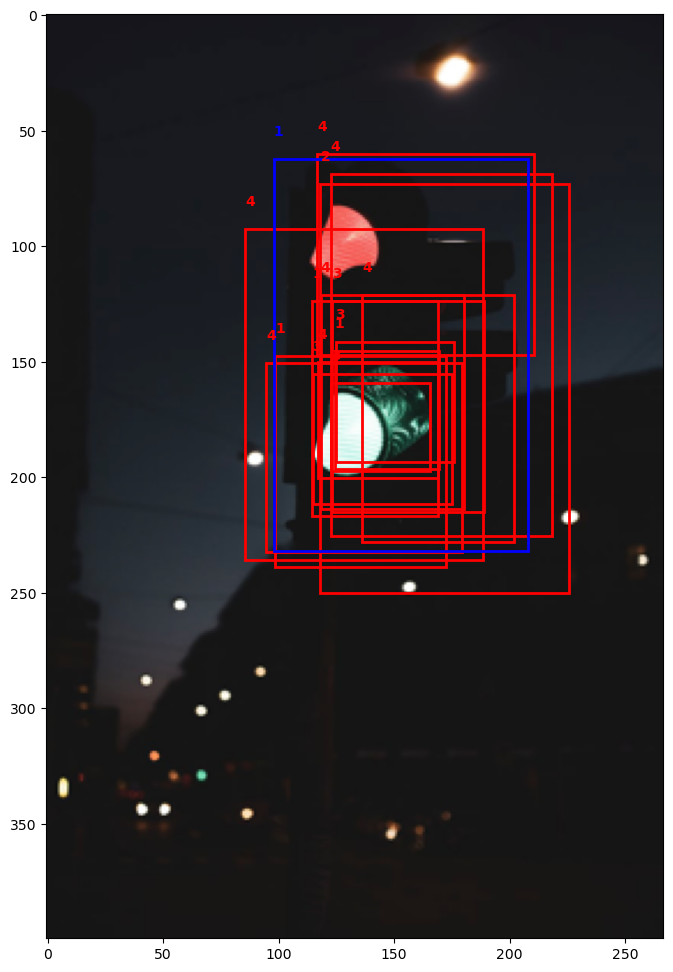

tensor([3, 3, 4, 2, 4, 4, 1, 3, 2, 1, 4, 4, 3, 2, 4, 2, 4, 1])
tensor([1])


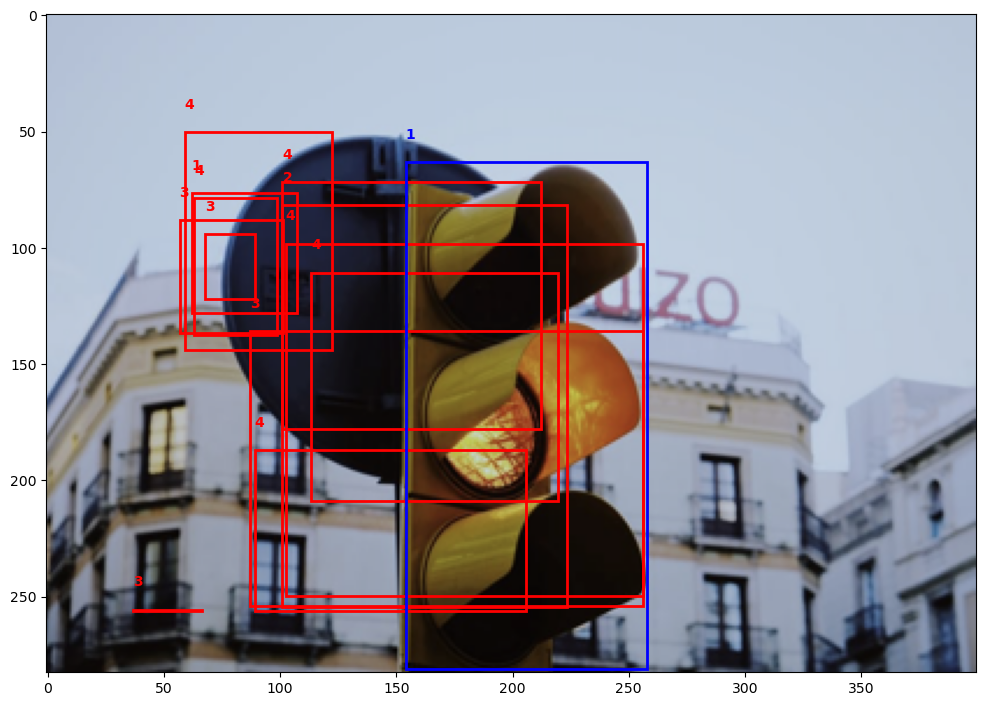

tensor([3, 3, 4, 2, 1, 4, 4, 4, 4, 3, 3, 2, 2, 4])
tensor([1])


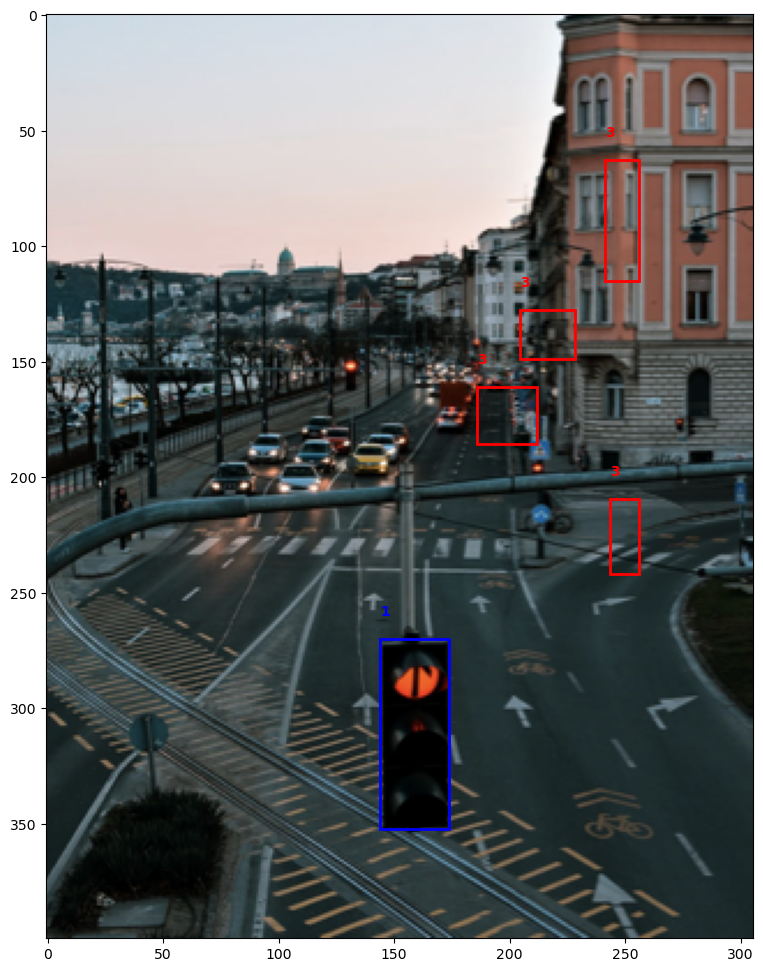

tensor([3, 3, 3, 3])
tensor([1])


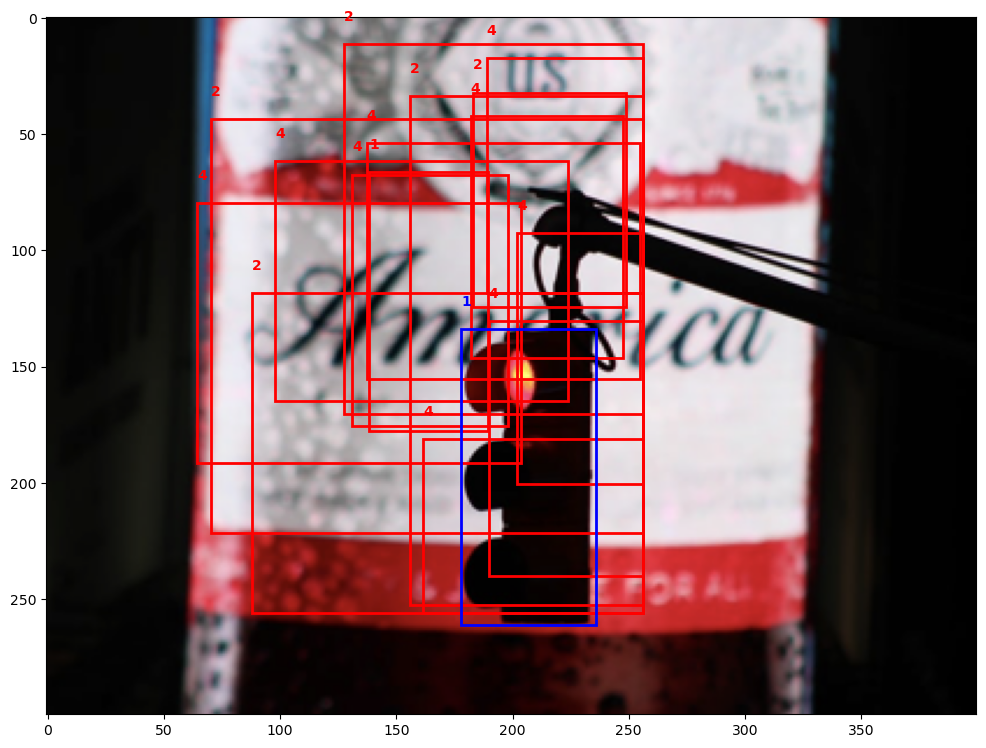

tensor([4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 1, 4, 4, 2])
tensor([1])


In [10]:
val_dataset_subset = dataset[:80]  # Get the first 80 entries
val_dataset = ObjectDetectionDataset(data=val_dataset_subset, transform=transform)

# Define the val_loader with the sliced dataset
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)


# Denormalize function (already provided in the previous example)
def denormalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)  # Denormalize: t * std + mean
    return tensor

import torch
import torchvision
from torchvision.ops import nms

def plot_predictions_on_originalALL(images, boxes, labels, ground_truth_boxes, ground_truth_labels, image_path, resize_factor=(1, 1)):
    """
    Visualizes the predicted bounding boxes and labels overlaid with ground truth on original images.
    """
    # Load the original image from disk (not transformed)
    original_image = Image.open(image_path).convert("RGB")
    
    # If the image was resized, adjust the bounding boxes accordingly
    width, height = original_image.size
    new_width, new_height = int(width * resize_factor[0]), int(height * resize_factor[1])
    original_image = original_image.resize((new_width, new_height))
    
    # Convert image to numpy for plotting
    image = np.array(original_image)
    
    # Plot the image
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.imshow(image)
    
    # Apply NMS to the model's predicted boxes (use a threshold to avoid too many false positives)
    nms_threshold = 0.9  # Confidence threshold for NMS
    if len(boxes) > 0:  # Only apply NMS if there are predicted boxes
        keep = nms(boxes, scores=torch.ones(len(boxes)), iou_threshold=nms_threshold)
        boxes = boxes[keep]
        labels = labels[keep]

    # Plot predicted bounding boxes and labels
    for i in range(len(boxes)):
        box = boxes[i].cpu().tolist()
        label = labels[i].item()
        
        rect = patches.Rectangle(
            (box[0], box[1]),  # xmin, ymin
            box[2] - box[0],   # width
            box[3] - box[1],   # height
            linewidth=2,
            edgecolor='r',      # Red for predicted boxes
            facecolor='none'
        )
        ax.add_patch(rect)

        # Display label for predicted box
        ax.text(
            box[0], box[1] - 10,  # Position above the box
            f'{label}',  # Only class for prediction
            fontsize=10,
            color='red',
            weight='bold'
        )
    
    # Draw ground truth boxes (use blue color)
    for i in range(len(ground_truth_boxes)):
        box = ground_truth_boxes[i].cpu().tolist()
        label = ground_truth_labels[i].item()

        rect = patches.Rectangle(
            (box[0], box[1]),  # xmin, ymin
            box[2] - box[0],   # width
            box[3] - box[1],   # height
            linewidth=2,
            edgecolor='b',      # Blue for ground truth boxes
            facecolor='none'
        )
        ax.add_patch(rect)

        # Display label for ground truth box
        ax.text(
            box[0], box[1] - 10,  # Position above the box
            f'{label}',  # Only class for ground truth
            fontsize=10,
            color='blue',
            weight='bold'
        )

    plt.show()

# Example usage:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
num = 0

# Assuming you have a batch of images and targets from the validation or training loader
for images, targets in val_loader:
    model.eval()  # Set model to evaluation mode
    # Run model inference
    with torch.no_grad():
        model_output = model(images)  # model returns predictions
        boxes = model_output[0]['boxes']
        labels = model_output[0]['labels']
        scores = model_output[0]['scores']

# Set a threshold for confidence (e.g., 0.5)
        threshold = 0.5
        high_confidence_indices = scores > threshold

# Filter out low-confidence boxes
        boxes = boxes[high_confidence_indices]
        labels = labels[high_confidence_indices]
        scores = scores[high_confidence_indices]
        
    
    # Load image path from dataset or use a specific one from your image folder
    
    image_path = os.path.join(image_folder, f'road{num}.png')  # Create image path like 'road1.png', 'road2.png', etc.
    num += 1
   
    if num >= 5:
        break
        
    plot_predictions_on_originalALL(
        images,  # Images batch
        model_output[0]['boxes'],  # Predicted bounding boxes
        model_output[0]['labels'],  # Predicted labels
        targets[0]['boxes'],  # Ground truth bounding boxes
        targets[0]['labels'],  # Ground truth labels
        image_path,  # Path to the original image
    )
    
    print(model_output[0]['labels'])
    print(targets[0]['labels'])
     # Only visualize the first batch (remove this break to visualize more)


###  Model Visualizations Cont....
*Now these model visualizations below will show the predictions when it actually matched and demonstrate how the model did when it predicted the actual ground truth! We can see that sometimes it does provide provide a bounding box inside the image, but it some cases, it fails to find the same label and leads to no predictions matching the ground truth. This could be due to the model not being trained long enough.*

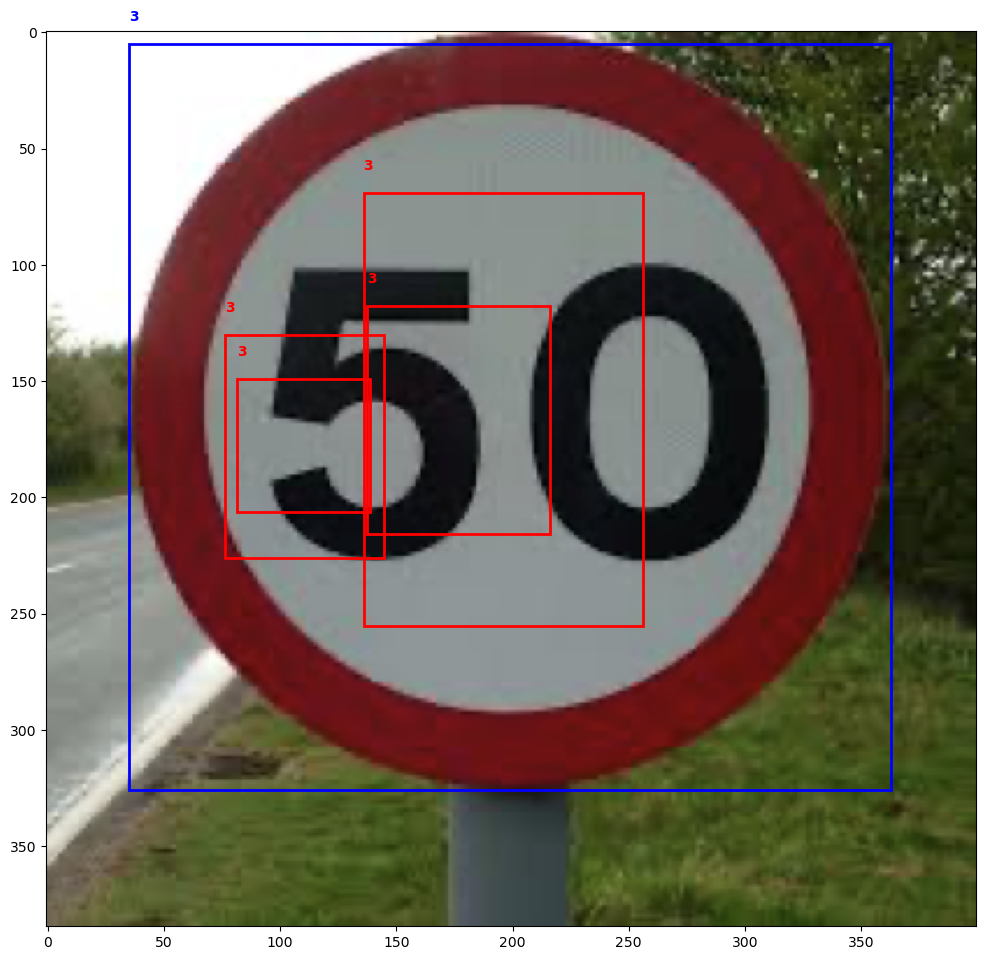

tensor([2, 3, 3, 3, 2, 3, 4, 2, 4, 4, 2, 4, 2])
tensor([3])


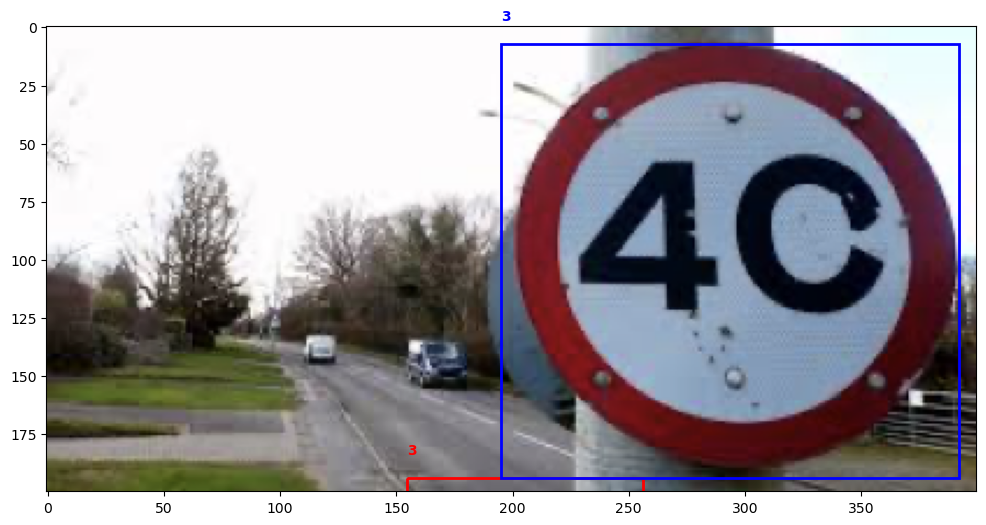

tensor([4, 4, 3, 3, 2, 2, 1, 1, 3])
tensor([3])


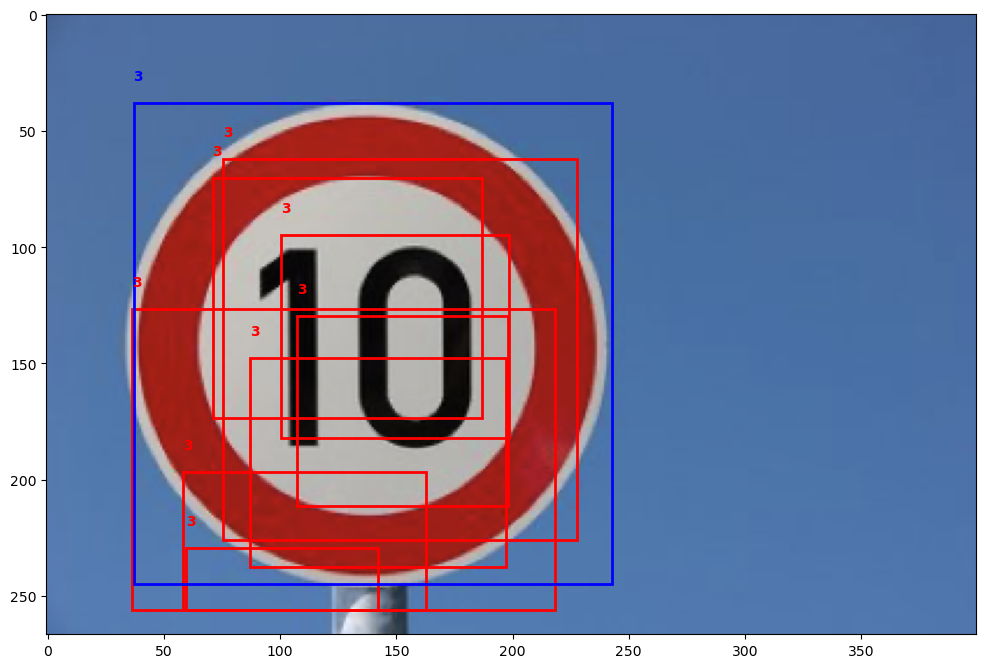

tensor([3, 3, 3, 2, 3, 2, 3, 2, 4, 2, 4, 2, 3, 4, 4, 2, 2, 2, 2, 3, 4, 4, 4, 3])
tensor([3])


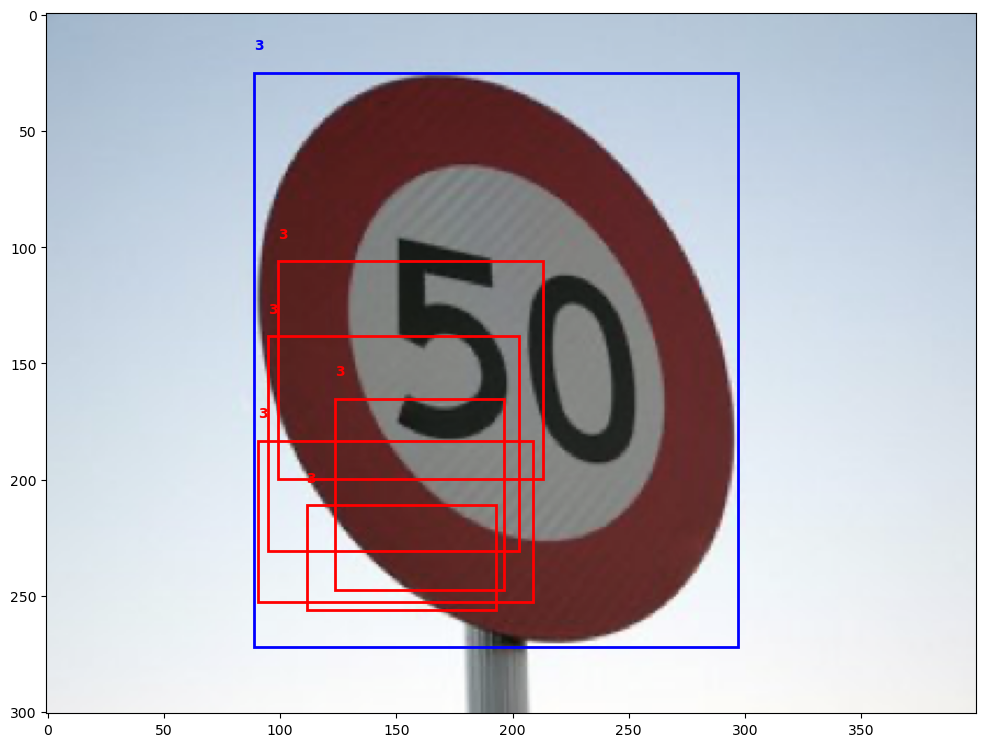

tensor([3, 2, 3, 3, 3, 3, 2, 4, 3, 3, 2, 4, 4, 4])
tensor([3])


In [11]:
val_dataset_subset = dataset[100:160]  # Get the first 80 entries
val_dataset = ObjectDetectionDataset(data=val_dataset_subset, transform=transform)

# Define the val_loader with the sliced dataset
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)
def plot_predictions_on_originalSAME(images, boxes, labels, ground_truth_boxes, ground_truth_labels, image_path, resize_factor=(1, 1)):
    """
    Visualizes the predicted bounding boxes and labels overlaid with ground truth on original images.
    Only draws boxes where predicted labels match ground truth labels.
    """
    # Load the original image from disk (not transformed)
    original_image = Image.open(image_path).convert("RGB")
    
    # If the image was resized, adjust the bounding boxes accordingly
    width, height = original_image.size
    new_width, new_height = int(width * resize_factor[0]), int(height * resize_factor[1])
    original_image = original_image.resize((new_width, new_height))
    
    # Convert image to numpy for plotting
    image = np.array(original_image)
    
    # Plot the image
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.imshow(image)
    
    # Apply NMS to the model's predicted boxes (use a threshold to avoid too many false positives)
    nms_threshold = 0.75  # Confidence threshold for NMS
    if len(boxes) > 0:  # Only apply NMS if there are predicted boxes
        keep = nms(boxes, scores=torch.ones(len(boxes)), iou_threshold=nms_threshold)
        boxes = boxes[keep]
        labels = labels[keep]

    # Plot predicted bounding boxes and labels (only for matching predictions)
    for i in range(len(boxes)):
        box = boxes[i].cpu().tolist()
        
        label = labels[i].item()

        # Loop through ground truth boxes and check for matching labels
        for j in range(len(ground_truth_boxes)):
            ground_truth_label = ground_truth_labels[j].item()
            if label == ground_truth_label:
                rect = patches.Rectangle(
                    (box[0], box[1]),  # xmin, ymin
                    box[2] - box[0],   # width
                    box[3] - box[1],   # height
                    linewidth=2,
                    edgecolor='r',      # Red for predicted boxes
                    facecolor='none'
                )
                ax.add_patch(rect)

                # Display label for predicted box
                ax.text(
                    box[0], box[1]-10,  # Position above the box
                    f'{label}',  # Only class for prediction
                    fontsize=10,
                    color='red',
                    weight='bold'
                )
    
    # Draw ground truth boxes (use blue color)
    for i in range(len(ground_truth_boxes)):
        box = ground_truth_boxes[i].cpu().tolist()
        label = ground_truth_labels[i].item()

        rect = patches.Rectangle(
            (box[0], box[1]),  # xmin, ymin
            box[2] - box[0],   # width
            box[3] - box[1],   # height
            linewidth=2,
            edgecolor='b',      # Blue for ground truth boxes
            facecolor='none'
        )
        ax.add_patch(rect)

        # Display label for ground truth box
        ax.text(
            box[0], box[1] - 10,  # Position above the box
            f'{label}',  # Only class for ground truth
            fontsize=10,
            color='blue',
            weight='bold'
        )

    plt.show()

# Example usage:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
num = 100

# Assuming you have a batch of images and targets from the validation or training loader
for images, targets in val_loader:
    model.eval()  # Set model to evaluation mode
    # Run model inference
    with torch.no_grad():
        model_output = model(images)  # model returns predictions
        boxes = model_output[0]['boxes']
        labels = model_output[0]['labels']
        scores = model_output[0]['scores']

        # Set a threshold for confidence (e.g., 0.5)
        threshold = 0.75
        high_confidence_indices = scores > threshold

        # Filter out low-confidence boxes
        boxes = boxes[high_confidence_indices]
        labels = labels[high_confidence_indices]
        scores = scores[high_confidence_indices]
    
    # Load image path from dataset or use a specific one from your image folder
    image_path = os.path.join(image_folder, f'road{num}.png')  # Create image path like 'road1.png', 'road2.png', etc.
    num += 1
    
    if num >= 105:
        break

    # Visualize the first image in the batch
    plot_predictions_on_originalSAME(
        images,  # Images batch
        model_output[0]['boxes'],  # Predicted bounding boxes
        model_output[0]['labels'],  # Predicted labels
        targets[0]['boxes'],  # Ground truth bounding boxes
        targets[0]['labels'],  # Ground truth labels
        image_path,  # Path to the original image
    )
    
    print(model_output[0]['labels'])
    print(targets[0]['labels'])
    # Only visualize the first batch (remove this break to visualize more)


###  <span style="color:deepskyblue"> More Model Visualizations!! </span> 
*In this model visualization below, we plotted the confidence scores of each prediction in the form of a heat map and we also provided the scores of said confindence. As we can see our model is not particularly confident in it's predictions, but I think it brings an important aspect of object detection in that it requires a large amount of training. Our model was only trained for 5 epochs due to limitations on my computer, but I imagine over time, this number would naturally increase. Object detection is very demanding in terms of training and requires very strong GPUS.*



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([0.1198, 0.1096, 0.0972, 0.0927, 0.0896, 0.0824, 0.0819, 0.0807, 0.0748,
        0.0695, 0.0695, 0.0693, 0.0668, 0.0626, 0.0620, 0.0596, 0.0586, 0.0585,
        0.0547, 0.0545, 0.0545])


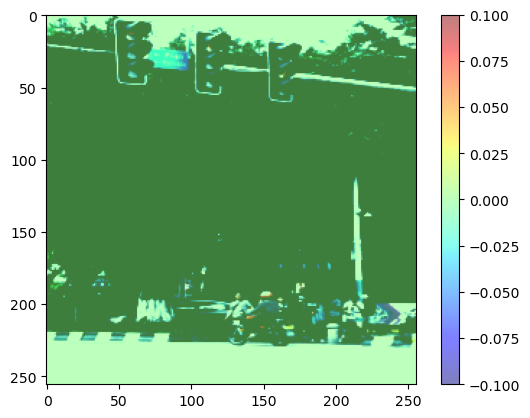

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([0.2145, 0.1020, 0.0916, 0.0875, 0.0871, 0.0774, 0.0697, 0.0635, 0.0585,
        0.0531, 0.0517, 0.0508])


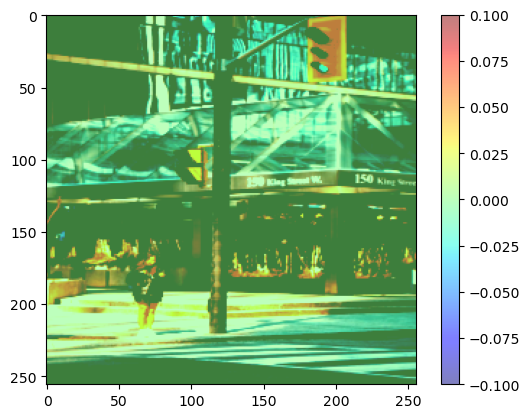

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([0.1785, 0.1764, 0.1741, 0.1692, 0.1179, 0.0940, 0.0880, 0.0879, 0.0870,
        0.0773, 0.0729, 0.0723, 0.0617, 0.0533])


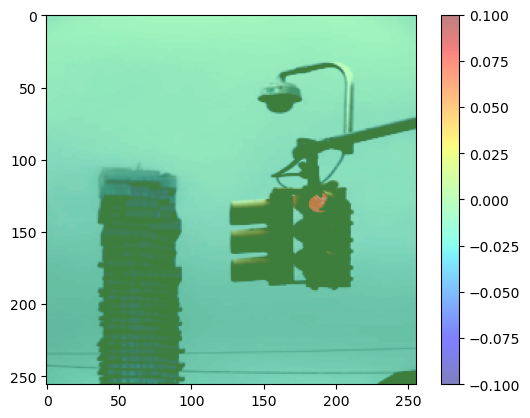

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([0.0560, 0.0523])


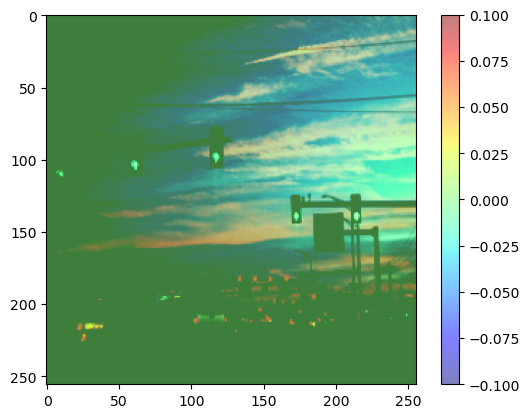

tensor([0.3047, 0.2113, 0.2095, 0.1790, 0.1579, 0.1478, 0.1151, 0.1037, 0.0847,
        0.0767])


In [12]:
val_dataset_subset = dataset[40:80]  # Get the first 80 entries
val_dataset = ObjectDetectionDataset(data=val_dataset_subset, transform=transform)

# Define the val_loader with the sliced dataset
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

def plot_confidence_heatmap(image, boxes, scores, threshold=0.5):
    """
    Visualizes a heatmap of prediction confidence scores.
    """
    # Convert image to a numpy array
    image = np.array(image)

    # Create a blank heatmap
    heatmap = np.zeros((image.shape[0], image.shape[1]))

    # Overlay heatmap with prediction scores
    for i, box in enumerate(boxes):
        score = scores[i]
        if score > threshold:  # Apply a score threshold to avoid clutter
            x1, y1, x2, y2 = box
            heatmap[y1:y2, x1:x2] += score  # Add confidence score to the corresponding area

    # Normalize the heatmap
    heatmap = np.clip(heatmap, 0, 1)
    heatmap = np.uint8(255 * heatmap)

    # Plot the heatmap over the image
    plt.imshow(image)
    plt.imshow(heatmap, alpha=0.5, cmap='jet')  # Apply heatmap with transparency
    plt.colorbar()
    plt.show()

    
num = 0
    
# Loop through val_loader, get predictions, and plot the heatmap for each image
model.eval()  # Ensure model is in evaluation mode
with torch.no_grad():
    for images, targets in val_loader:
        # Forward pass (model inference)
        model_output = model(images)
        
        # Extract predicted bounding boxes, labels, and scores
        boxes = model_output[0]['boxes']  # Shape: [num_predictions, 4] (x1, y1, x2, y2)
        labels = model_output[0]['labels']  # Shape: [num_predictions]
        scores = model_output[0]['scores']  # Shape: [num_predictions]
        print(scores)

        # Apply confidence threshold
        confidence_threshold = 0.5
        high_confidence_indices = scores > confidence_threshold
        
        # Filter boxes and scores based on the threshold
        pred_boxes = boxes[high_confidence_indices]
        pred_scores = scores[high_confidence_indices]

        # For visualization, we need to handle the image in the correct format
        image = images[0].cpu().numpy().transpose(1, 2, 0)  # Convert to HWC format (height, width, channels)
        num += 1
        if num >= 5:
            break

        # Now, plot the heatmap with the filtered predictions
        plot_confidence_heatmap(image, pred_boxes, pred_scores, threshold=confidence_threshold)
         # Optional: break after first image for testing

###  <span style="color:peru"> Final Conclusion for Faster R-CNN  </span> 
*Seeing as our model would need to be trained much more like a LOT MORE efficiently in order to get much more accurate results, it allows us to tie this whole thing thing together as we now have a good understanding of how exactly Faster R-CNN works with it's confidence scores, bounding boxes, and labels. Next up we will attempt to go over how YOLO (You only look once) which is another type of model and we will see how it works with this very same dataset!* 

# YOLO (You Only Look Once)

In [1]:
# Clone the YOLOv5 repository from GitHub
# This will download all the files and directories related to YOLOv5 into the current working directory
!git clone https://github.com/ultralytics/yolov5

# Once cloned, you can navigate into the 'yolov5' directory to access its codebase
# and start using it for object detection tasks.

Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 17075 (delta 29), reused 30 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17075/17075), 15.69 MiB | 9.79 MiB/s, done.
Resolving deltas: 100% (11723/11723), done.


### Change Directory to `yolov5`

In [2]:
# Navigate into the 'yolov5' directory where the YOLOv5 project files are located
%cd yolov5

/Users/maanaslalwani/Downloads/yolov5


### Install Required Python Packages for YOLOv5

In [3]:
# Install all required Python libraries and dependencies for YOLOv5
# The '-r requirements.txt' argument specifies the file containing the list of dependencies
!pip install -r requirements.txt

### Importing Necessary Libraries for XML Processing and Data Handling

In [4]:
import xml.etree.ElementTree as ET  # Library for parsing and creating XML data
import os  # Provides functions to interact with the file system (e.g., navigating directories)
from tqdm import tqdm  # Displays progress bars for loops, making long-running processes more user-friendly
import pandas as pd

In [5]:
# Path to the directory containing the input files (e.g., raw XML data or images)
source_path = '/Users/maanaslalwani/Desktop/ASU/DAT 494/archive'

# Path to the directory where processed output files will be saved (e.g., YOLOv5 format data)
destination_path = '/Users/maanaslalwani/Desktop/ASU/DAT 494/yolov5'

In [6]:
# Constructs the path to the 'annotations' folder within the input directory
annotations_dir = os.path.join(source_path, 'annotations')

# Retrieves a list of all files in the 'annotations' directory
annotation_files = os.listdir(annotations_dir)

### Extracting and Organizing Annotation Data from XML Files

In [7]:
# Data lists for bounding box information
file_names, widths, heights = [], [], []
labels, x_mins, y_mins, x_maxes, y_maxes = [], [], [], [], []

# Iterate through all annotation files
for i in tqdm(range(len(annotation_files))):  # `tqdm` provides a progress bar for the loop

    # Parse the XML file
    xml_tree = ET.parse(os.path.join(annotations_dir, annotation_files[i]))
    root_node = xml_tree.getroot()

    # Extract the image file name
    img_file = root_node.find('filename').text

    # Extract image dimensions (width and height)
    img_size = root_node.find('size')
    img_width = img_size.find('width').text
    img_height = img_size.find('height').text

    # Iterate through all objects in the XML file
    for obj in root_node.findall('object'):
        category = obj.find('name').text # Extract the object label
        bbox = obj.find('bndbox')  # Extract the bounding box coordinates
        x_min = bbox.find('xmin').text
        y_min = bbox.find('ymin').text
        x_max = bbox.find('xmax').text
        y_max = bbox.find('ymax').text

        # Append the extracted data to the corresponding lists
        file_names.append(img_file)
        widths.append(img_width)
        heights.append(img_height)
        x_mins.append(x_min)
        y_mins.append(y_min)
        x_maxes.append(x_max)
        y_maxes.append(y_max)
        labels.append(category)

  0%|          | 0/877 [00:00<?, ?it/s]

100%|██████████| 877/877 [00:00<00:00, 3130.58it/s]


### Creating a DataFrame to Store Annotation Data

In [8]:
# Create a DataFrame from the extracted annotation data
bbox_df = pd.DataFrame({
    'image_name': file_names,  # Name of the image file
    'img_width': widths,        # Width of the image
    'img_height': heights,      # Height of the image
    'x_min': x_mins,          # xmin coordinate of the bounding box
    'y_min': y_mins,          # ymin coordinate of the bounding box
    'x_max': x_maxes,          # xmax coordinate of the bounding box
    'y_max': y_maxes,          # ymax coordinate of the bounding box
    'class_label': labels         # Object label for the bounding box
})

# Display the first few rows of the DataFrame to verify the data
bbox_df.head()

image_name img_width img_height x_min y_min x_max y_max class_label
0  road712.png       300        400    98   140   139   182  speedlimit
1  road712.png       300        400    97   205   138   246  speedlimit
2  road706.png       300        400   136    92   177   135  speedlimit
3  road706.png       300        400   135   159   177   201  speedlimit
4  road289.png       300        400    61   140   146   227        stop

In [9]:
import pybboxes as pbx  # Library for converting bounding box formats (e.g., Pascal VOC to YOLO)
from collections import defaultdict  # Provides a dictionary-like data structure with default values
import shutil  # Module for file and directory operations, such as copying or moving files
from random import shuffle

In [10]:
categories = bbox_df['class_label'].unique().tolist()
categories

['speedlimit', 'stop', 'trafficlight', 'crosswalk']

In [11]:
## Add class number associated to classes
bbox_df['class_num'] = bbox_df['class_label'].apply(lambda x: categories.index(x))
bbox_df.head()

image_name img_width img_height x_min y_min x_max y_max class_label  \
0  road712.png       300        400    98   140   139   182  speedlimit   
1  road712.png       300        400    97   205   138   246  speedlimit   
2  road706.png       300        400   136    92   177   135  speedlimit   
3  road706.png       300        400   135   159   177   201  speedlimit   
4  road289.png       300        400    61   140   146   227        stop   

   class_num  
0          0  
1          0  
2          0  
3          0  
4          1

### Generating a Dictionary to Organize Bounding Box Data by Image Name

In [12]:
from tqdm import tqdm  # For progress visualization
from collections import defaultdict  # For creating a dictionary with default list values

# Initialize a dictionary where each image name maps to a list of bounding box details
image_annotations = defaultdict(list)

# Iterate through the DataFrame rows to process bounding box data
for i in tqdm(range(len(bbox_df))):
    annotations = []
    img_name = bbox_df.loc[i, 'image_name']
    x_min, y_min = bbox_df.loc[i, 'x_min'], bbox_df.loc[i, 'y_min']
    x_max, y_max = bbox_df.loc[i, 'x_max'], bbox_df.loc[i, 'y_max']
    class_id = bbox_df.loc[i, 'class_num']
    img_width, img_height = int(bbox_df.loc[i, 'img_width']), int(bbox_df.loc[i, 'img_height'])

    # Define the bounding box in Pascal VOC format
    voc_box = (int(x_min), int(y_min), int(x_max), int(y_max))

    # Convert the bounding box to YOLO format using the `pybboxes` library
    x_center, y_center, bbox_width, bbox_height = pbx.convert_bbox(
        voc_box, from_type="voc", to_type="yolo", image_size=(img_width, img_height))

    # Create a string representation of the bounding box details in YOLO format
    annotations.append(f"{class_id} {x_center} {y_center} {bbox_width} {bbox_height}")
    image_annotations[img_name].append(" ".join(annotations))  # Combine the details into a single line


100%|██████████| 1244/1244 [00:00<00:00, 23594.19it/s]


In [13]:
# Define the path for the labels directory inside the YOLOv5 data folder
labels_folder = f'{destination_path}/data/labels'

# Check if the directory exists, and if it does, delete it
if os.path.exists(labels_folder):
    shutil.rmtree(labels_folder)  # Remove the existing directory and its contents

# Create a fresh labels directory
os.mkdir(labels_folder)

### Generating `.txt` Files for Each Image

In [14]:
# Iterate over the dictionary containing image names and bounding box information
for img, label_lines in image_annotations.items():
    # Extract the base name of the image (without file extension)
    img_basename = img.split('.')[0]
    
    # Create a corresponding `.txt` file in the labels directory
    with open(f'{labels_folder}/{img_basename}.txt', 'w') as label_file:
        # Write each bounding box line to the file
        for line in label_lines:
            label_file.write(line + '\n')

In [15]:
images_path = source_path + '/images'
labels_path = labels_folder   ## directory having labels in .txt format

### Setting Up Training and Validation Directories for YOLOv5

In [16]:
# Define paths for the training and validation directories
train_path = destination_path + '/data/train'
val_path = destination_path + '/data/val'

# Create necessary folders
for path in [train_path, val_path]:
    if os.path.exists(path):
        shutil.rmtree(path)
    os.mkdir(path)
    os.mkdir(path + '/images')
    os.mkdir(path + '/labels')

In [17]:
# Get the list of image file names from the images directory
image_files = os.listdir(f'{source_path}/images')  # `images_path` points to the directory containing image files

# Shuffle the list of image file names randomly
shuffle(image_files)  # Randomizes the order of file names

### Splitting Files and Copying Them to Train/Validation Folders

In [18]:
# Function to split a list of files into two subsets based on a ratio
def partition(files, ratio):
    split_idx = int(len(files) * ratio)
    return files[:split_idx], files[split_idx:]

# Function to copy image and label files to their respective directories
def copy_dataset(files, img_dir, lbl_dir, destination):
    for img_file in files:
        img_basename = img_file.split('.')[0]
        shutil.copy(f'{img_dir}/{img_basename}.png', f'{destination}/images')
        shutil.copy(f'{lbl_dir}/{img_basename}.txt', f'{destination}/labels')

In [19]:
images_path, labels_path, train_path

('/Users/maanaslalwani/Desktop/ASU/DAT 494/archive/images',
 '/Users/maanaslalwani/Desktop/ASU/DAT 494/yolov5/data/labels',
 '/Users/maanaslalwani/Desktop/ASU/DAT 494/yolov5/data/train')

In [20]:
train_files, val_files = partition(image_files, 0.75)
copy_dataset(train_files, f'{source_path}/images', labels_folder, train_path)
copy_dataset(val_files, f'{source_path}/images', labels_folder, val_path)

In [21]:
# Ensure that the total number of images in train and val directories
# equals the total number of images in the original images directory
assert (len(os.listdir(train_path + '/images')) + len(os.listdir(val_path + '/images')) == len(image_files))

In [22]:
yaml_path = f'{destination_path}/data/traffic_sign_data.yaml'
with open(yaml_path, 'w') as yaml_file:
    yaml_file.write('train: ../data/train/images\n')
    yaml_file.write('val: ../data/val/images\n')
    yaml_file.write(f'nc: {len(categories)}\n')
    yaml_file.write(f'names: {categories}\n')

In [24]:
epochs = 20 # Number of times the model will go through the entire dataset
!python train.py --img 640 --batch 16 --epochs {epochs} --data sign_data.yaml --weights yolov5s.pt
# Image size for training (640x640 pixels)
# Batch size (number of images processed at once)
# Number of epochs (training iterations over the dataset)
# Path to the YAML file with dataset configuration
# Pre-trained weights (yolov5s.pt for YOLOv5 small model)

train: weights=yolov5s.pt, cfg=, data=sign_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
fatal: cannot change to '/Users/maanaslalwani/Desktop/ASU/DAT': No such file or directory
YOLOv5 🚀 2024-12-7 Python-3.12.4 torch-2.4.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, wa

In [23]:
# results stored in runs/train 
# get the last stored result
results_path = sorted(os.listdir(f'{destination_path}/runs/train'))[-1]
result_dir = f'{destination_path}/runs/train/{results_path}'

### Visualizing a Predicted Image from Validation Results

In [24]:
import matplotlib.pyplot as plt
from PIL import Image # Importing PIL (Python Imaging Library) for image processing

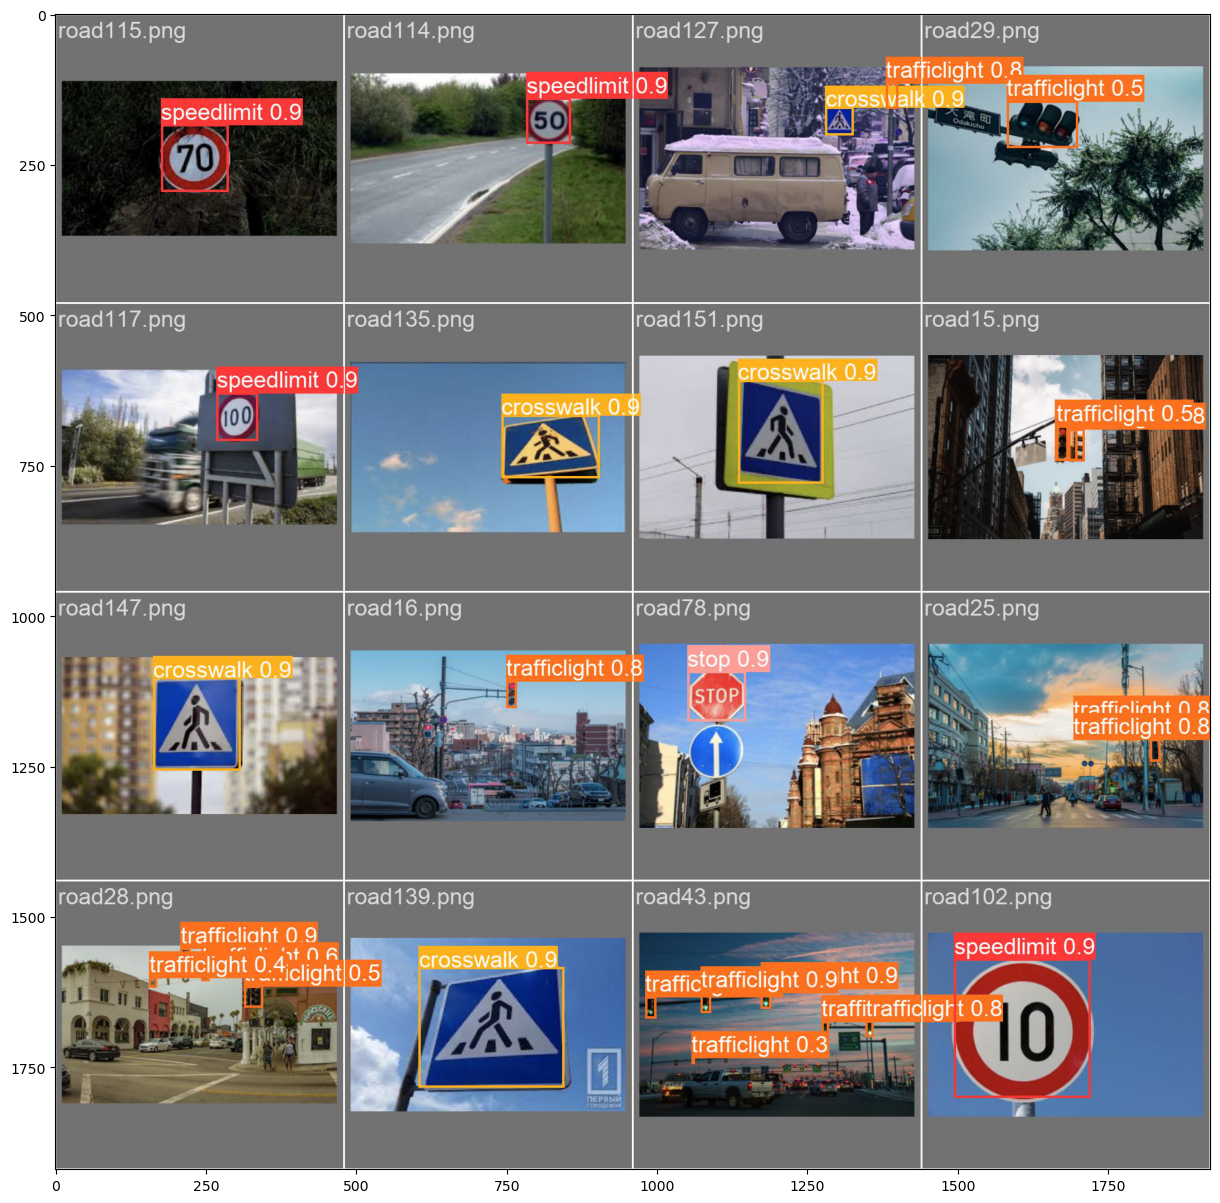

In [28]:
# Specify the path to the predicted image from the validation set
result_image_path = f'{result_dir}/val_batch0_pred.jpg'
image = Image.open(result_image_path)
plt.figure(figsize=(15, 15))
plt.imshow(image)

# Conclusion

The YOLO training process successfully equips the model to detect and classify traffic signs with high accuracy, leveraging its real-time object detection capability. The model's performance is evaluated using metrics like mean Average Precision (mAP), and visualized predictions confirm its ability to localize and label objects effectively. If needed, further enhancements can be achieved through hyperparameter tuning, data augmentation, or additional training epochs. The trained model is ready for deployment in practical applications like autonomous driving or road safety monitoring.